# Logistic Regression using Python and Scikit-Learn

In [2]:
# import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
%matplotlib inline

# import warnings
# warnings.filterwarnings("ignore")

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score

In [3]:
# load the dataset

df = pd.read_csv(r"D:\Projects\Loan Eligibility\data\loan-train.csv")

In [4]:
# preview the dataset

df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
# drop the Loan_ID column, as it is of no use

data = df.drop(columns=["Loan_ID"])

In [6]:
# check the summary of data

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [7]:
# check all the columns

data.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [8]:
# check categorical feature columns 

categorical_data = [i for i in data.columns if data[i].dtype == "object"]
categorical_data

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

In [9]:
# check numerical feature columns

numerical_data = [i for i in data.columns if data[i].dtype != "object"]
numerical_data

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [10]:
# check uniqe values in the dataset

data.nunique()

Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [11]:
# check discrete numerical columns

discrete_numerical_data = [i for i in numerical_data if len(data[i].unique()) < 15]
discrete_numerical_data

['Loan_Amount_Term', 'Credit_History']

In [12]:
# check continuous numerical columns

continuous_numerical_data = [i for i in numerical_data if len(data[i].unique()) >= 15]
continuous_numerical_data

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

### Data Visualisation

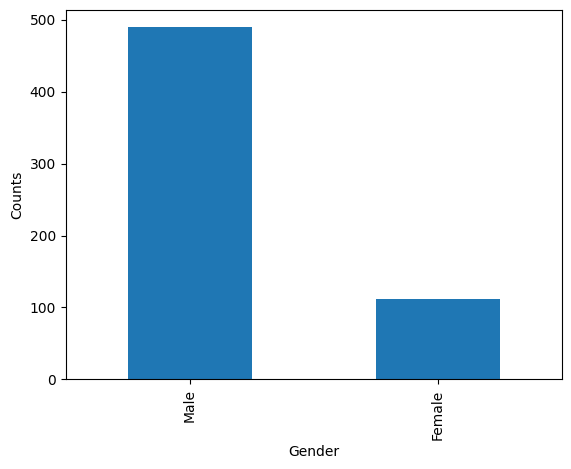

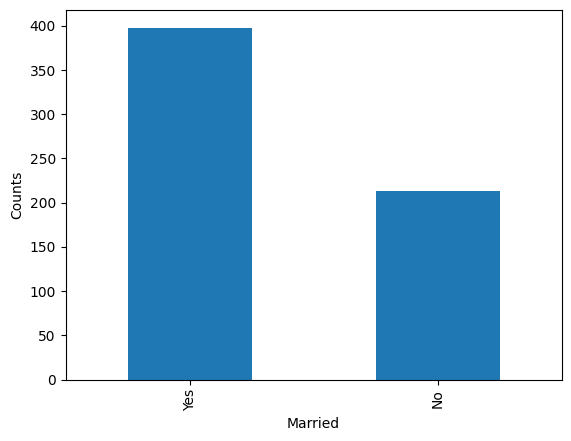

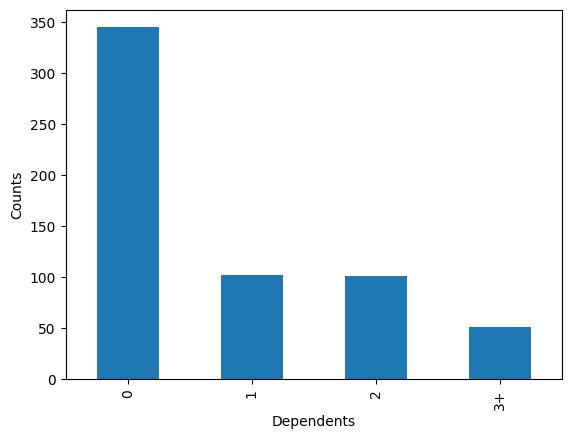

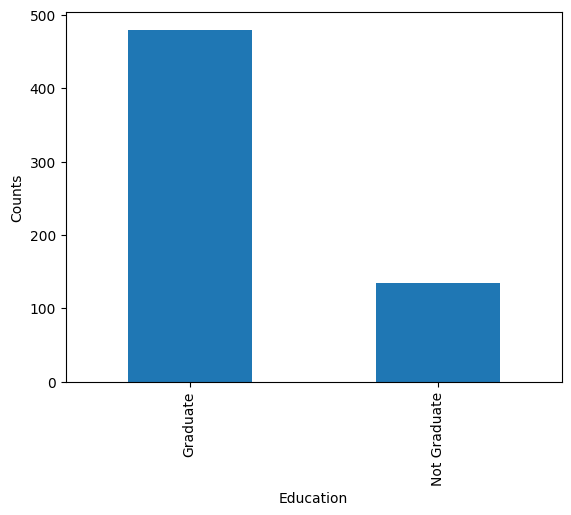

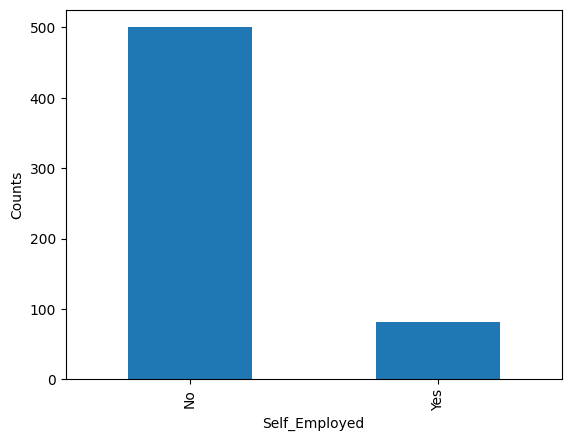

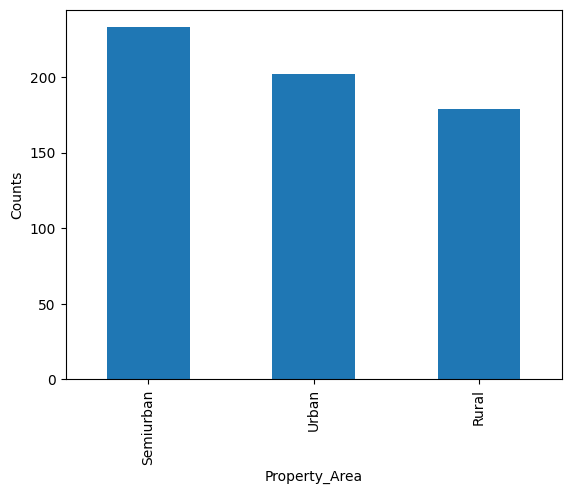

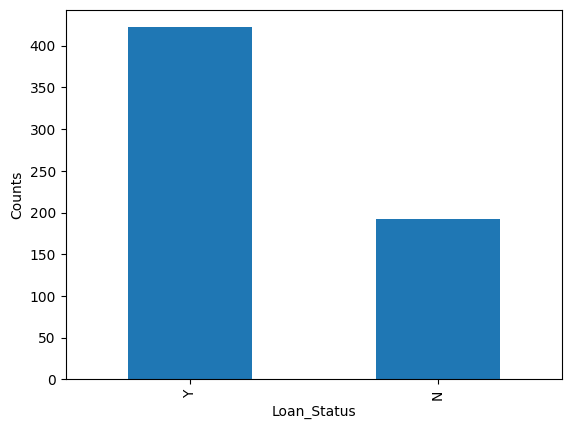

In [13]:
# for categorical data

for i in categorical_data:
    data[i].value_counts().plot(kind="bar")
    plt.xlabel(i)
    plt.ylabel("Counts")
    plt.show()

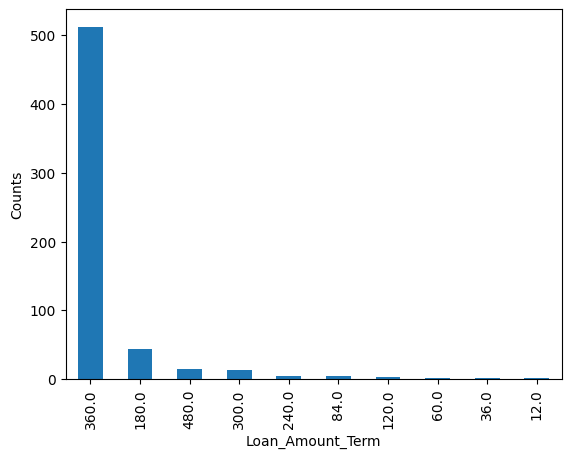

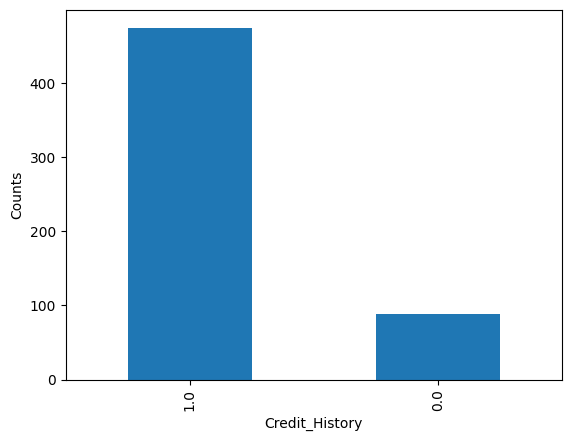

In [14]:
# for discrete numerical data

for i in discrete_numerical_data:
    data[i].value_counts().plot(kind="bar")
    plt.xlabel(i)
    plt.ylabel("Counts")
    plt.show()

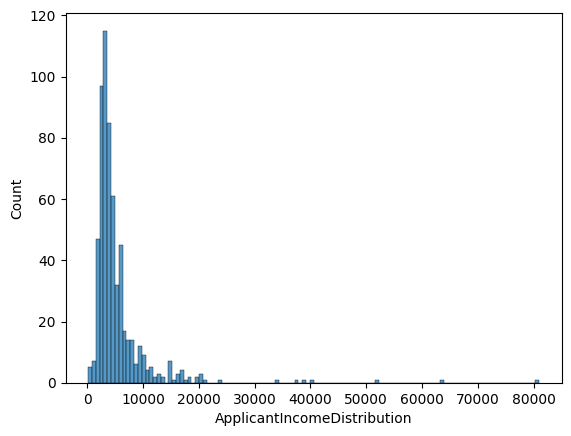

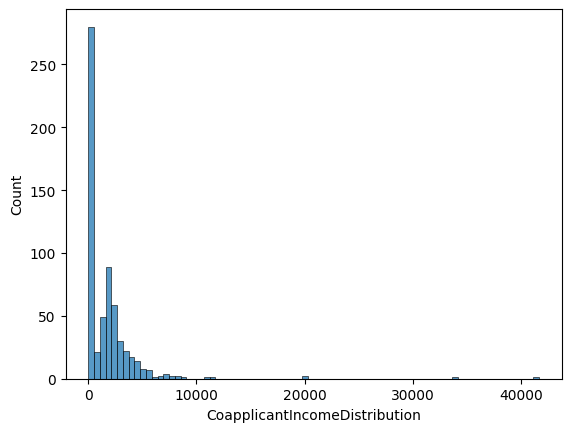

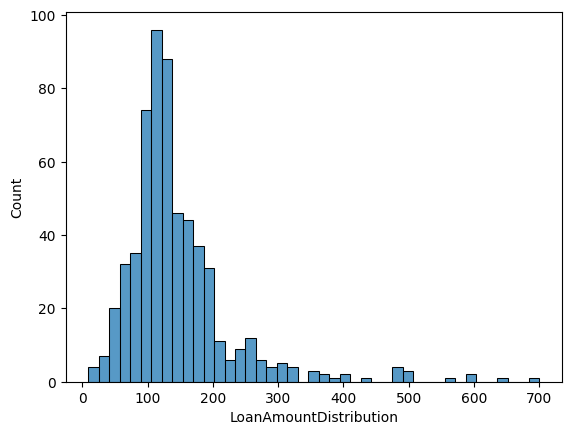

In [15]:
# for continuous numerical data

for i in continuous_numerical_data:
    sns.histplot(data[i])
    plt.xlabel(i+"Distribution")
    plt.show()

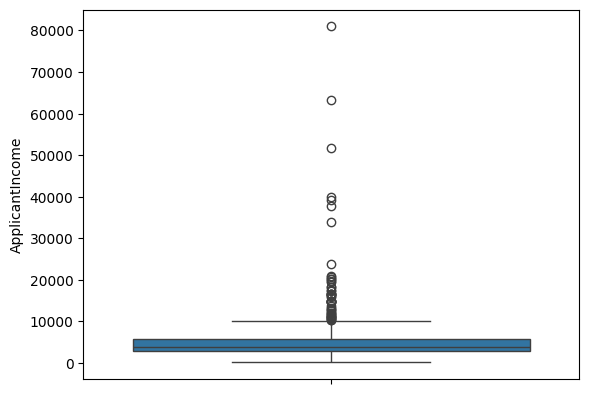

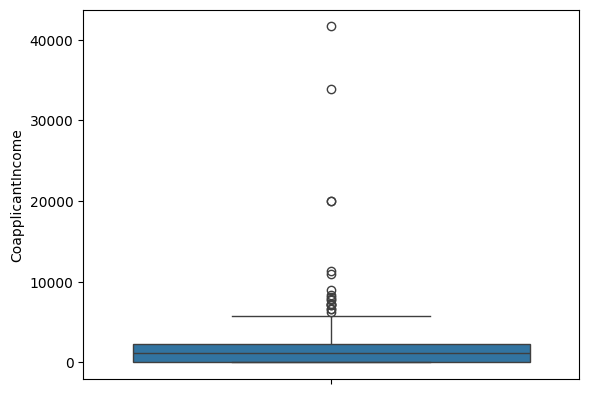

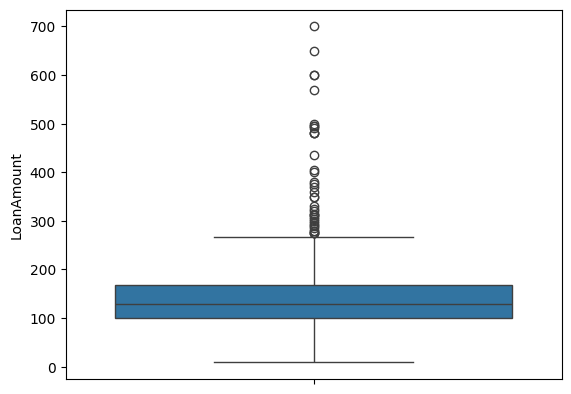

In [16]:
# check for outliers

for i in continuous_numerical_data:
    sns.boxplot(data= data, y=i)
    plt.show()

### Check for Missing values in the dataset

In [17]:
# check missing values in the columns

data.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<Axes: >

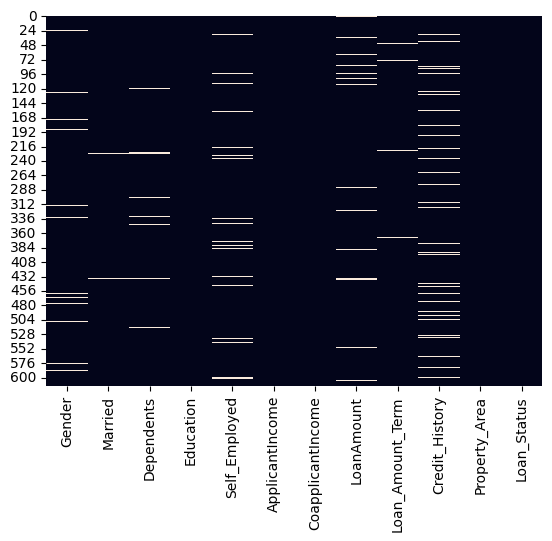

In [18]:
# heatmapt to check missing values

sns.heatmap(data.isnull(), cbar= False)

In [19]:
# filling the missing values with mode method

for i in categorical_data+discrete_numerical_data:
    data[i]= data[i].fillna(data[i].mode().iloc[0])

In [20]:
# replace LoanAmount column from numerical category with median method

data["LoanAmount"] = data["LoanAmount"].fillna(data["LoanAmount"].median())

In [21]:
# checking the null values

data.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [22]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


### Feature Engineering

Feature engineering is the process of transforming raw data into useful features. These features will help us understand our model better and increase its predictive power. I will perform feature engineering on different types of variables using scikit learn's powerful method LabelEncoder.

In [23]:
# encoding the categorical data using label encoding method

le = preprocessing.LabelEncoder()

for i in categorical_data:
    data[i] = le.fit_transform(data[i])

In [24]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


In [25]:
# check correlation matrix

data.corr()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.364569,0.172914,0.045364,-0.000525,0.058809,0.082912,0.106904,-0.074030,0.009170,-0.025752,0.017987
Married,0.364569,1.000000,0.334216,0.012304,0.004489,0.051708,0.075948,0.146546,-0.100912,0.010938,0.004257,0.091478
Dependents,0.172914,0.334216,1.000000,0.055752,0.056798,0.118202,0.030430,0.163103,-0.103864,-0.040160,-0.000244,0.010118
Education,0.045364,0.012304,0.055752,1.000000,-0.010383,-0.140760,-0.062290,-0.168759,-0.073928,-0.073658,-0.065243,-0.085884
Self_Employed,-0.000525,0.004489,0.056798,-0.010383,1.000000,0.127180,-0.016100,0.115100,-0.033739,-0.001550,-0.030860,-0.003700
ApplicantIncome,0.058809,0.051708,0.118202,-0.140760,0.127180,1.000000,-0.116605,0.565181,-0.046531,-0.018615,-0.009500,-0.004710
CoapplicantIncome,0.082912,0.075948,0.030430,-0.062290,-0.016100,-0.116605,1.000000,0.189218,-0.059383,0.011134,0.010522,-0.059187
LoanAmount,0.106904,0.146546,0.163103,-0.168759,0.115100,0.565181,0.189218,1.000000,0.036960,-0.000607,-0.046632,-0.033214
Loan_Amount_Term,-0.074030,-0.100912,-0.103864,-0.073928,-0.033739,-0.046531,-0.059383,0.036960,1.000000,-0.004705,-0.076120,-0.022549
Credit_History,0.009170,0.010938,-0.040160,-0.073658,-0.001550,-0.018615,0.011134,-0.000607,-0.004705,1.000000,0.001963,0.540556


<Axes: >

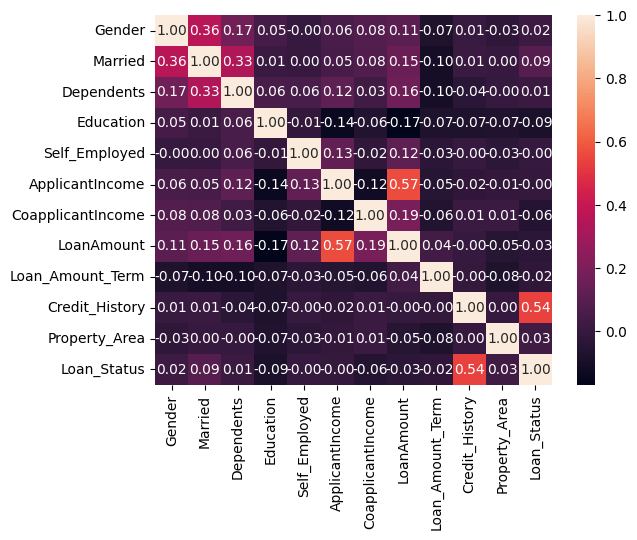

In [26]:
sns.heatmap(data.corr(),annot=True, cmap='rocket', fmt=".2f")

In [27]:
# if we want to apply log transformation for all the numerical variables, then majority of CoapplicantIncome values are 0.
# hence we will create a new variable called TotalIncome = ApplicantIncome + CoapplicantIncome.

data['TotalIncome'] = data['ApplicantIncome'] + data['CoapplicantIncome']

In [28]:
# check columns before dropping

data.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'TotalIncome'],
      dtype='object')

In [29]:
# drop the columns which were concataneted 

data.drop(['ApplicantIncome', 'CoapplicantIncome'], axis=1, inplace= True)

In [30]:
# re-check columns after dropping

data.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area',
       'Loan_Status', 'TotalIncome'],
      dtype='object')

In [31]:
# check columns

continuous_numerical_data

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

In [32]:
# removing old columns in place of new columns in countinuous numerical data 

continuous_numerical_data.remove('ApplicantIncome')
continuous_numerical_data.remove('CoapplicantIncome')
continuous_numerical_data.append('TotalIncome')

In [33]:
# re-check columns

continuous_numerical_data

['LoanAmount', 'TotalIncome']

In [34]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
0,1,0,0,0,0,128.0,360.0,1.0,2,1,5849.0
1,1,1,1,0,0,128.0,360.0,1.0,0,0,6091.0
2,1,1,0,0,1,66.0,360.0,1.0,2,1,3000.0
3,1,1,0,1,0,120.0,360.0,1.0,2,1,4941.0
4,1,0,0,0,0,141.0,360.0,1.0,2,1,6000.0


In [35]:
# log transformation

for i in continuous_numerical_data+['Loan_Amount_Term']:
    data[i] = np.log(data[i])

In [36]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
0,1,0,0,0,0,4.852030,5.886104,1.0,2,1,8.674026
1,1,1,1,0,0,4.852030,5.886104,1.0,0,0,8.714568
2,1,1,0,0,1,4.189655,5.886104,1.0,2,1,8.006368
3,1,1,0,1,0,4.787492,5.886104,1.0,2,1,8.505323
4,1,0,0,0,0,4.948760,5.886104,1.0,2,1,8.699515
